<center><h1>Act Report</h></center>

## Ananlyzing and Visulaizing WeRateDogs Twitter page

In [4]:
import numpy as np
import pandas as pd
import requests
import re
import json
import matplotlib.pyplot as plt

In [5]:
# reading data from the file we saved
df = pd.read_csv("twitter_archive_master.csv", index_col=0)

In [6]:
# converting timstamp column to the proper data type
df.timestamp = pd.to_datetime(df.timestamp)

In [7]:
# setting the timestamp as the index in order to make the index meaningful
df.set_index("timestamp", inplace=True)

### The Page Likes histogram 

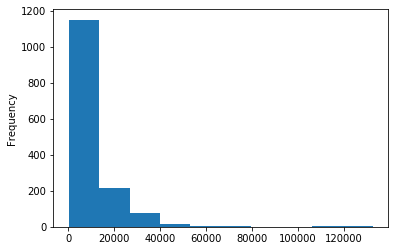

In [69]:
# showing the likes distribution
df.likes_counter.plot(kind="hist")

We can see that most likes ranges between 0 and 20000

### The Page retweets histogram

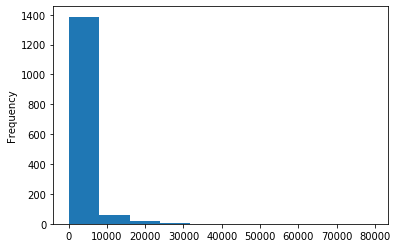

In [70]:
# showing the retweets number distribution
df.retweet_counter.plot(kind="hist")

We can see that most retweets ranges between 0 and 10000

### The Dog stages Bar Graph

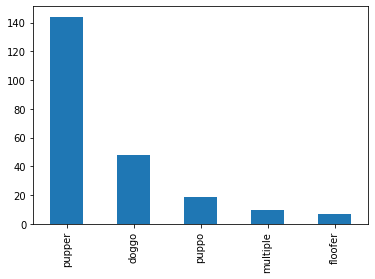

In [11]:
df.dog_stage.value_counts().plot(kind='bar')

### The most liked dog by followers

In [86]:
# getting the dog that got the highest likes
most_liked_dog = df[df.likes_counter==df.likes_counter.max()]
print("Page rating: ",str(most_liked_dog.values[0][2]) + "/10")
print("Name: ",most_liked_dog.values[0][4])
print("Dog_stage: ",most_liked_dog.values[0][5])
print("Breed: ",most_liked_dog.values[0][7])
print("Likes: ",most_liked_dog.values[0][9])
print("Retweets: ",most_liked_dog.values[0][10])

Page rating:  13.0/10
Name:  nan
Dog_stage:  puppo
Breed:  Lakeland_terrier
Likes:  132810
Retweets:  48265


The most liked dog was Lakeland_terrier breed with around 132810 likes with no name mentioned.

### The most retweeted dog by followers

In [87]:
# getting the dog that got the highest retweets
most_retweeted_dog = df[df.retweet_counter==df.retweet_counter.max()]
print("Page rating: ",str(most_retweeted_dog.values[0][2]) + "/10")
print("Name: ",most_retweeted_dog.values[0][4])
print("Dog_stage: ",most_retweeted_dog.values[0][5])
print("Breed: ",most_retweeted_dog.values[0][7])
print("Likes: ",most_retweeted_dog.values[0][9])
print("Retweets: ",most_retweeted_dog.values[0][10])

Page rating:  13.0/10
Name:  nan
Dog_stage:  doggo
Breed:  Labrador_retriever
Likes:  131075
Retweets:  79515


The most retweeted dog was Labrador_retriever breed with around 79515 retweets and also the name is missing.

### Page Likes over time

(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

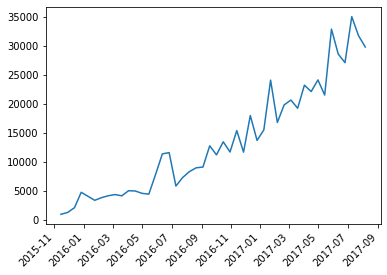

In [88]:
# showing the average likes rate of every two weeks over time
plt.plot(df.likes_counter.resample("2W").mean())
plt.xticks(rotation=45, ha='right')

We resampled our data for each two weeks and we measured the average of likes, we find that the number of likes is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

### Page retweets rate over time

(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

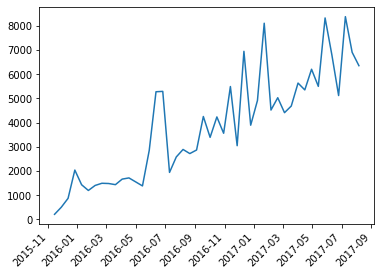

In [89]:
# showing the average retweet rate of every two weeks over time
plt.plot(df.retweet_counter.resample("2w").mean())
plt.xticks(rotation=45, ha='right')

We also resampled our data for each two weeks and we measured the average of retweet rate. We find that the number of retweets is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

### Top 10 common breeds retweeted

Text(0.5, 1.0, 'Top 10 most common dog breeds')

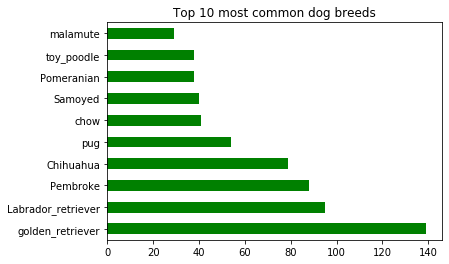

In [90]:
# showing the most common breeds in dogs
df["dog_prediction"].value_counts()[:10].plot(kind="barh", color='g')
plt.title("Top 10 most common dog breeds")

We also investigated the top 10 common breeds in dogs and we can notice that the most common breed is “Golden retriever” and the lowest is “Malamute”.

### Highest page rate

In [91]:
# showing the highest rated dog
highest_dog_page_rate= df[df["rating_numerator"]==df["rating_numerator"].max()]
print("Page rating: ",str(highest_dog_page_rate.values[0][2]) + "/10")
print("Name: ",highest_dog_page_rate.values[0][4])
print("Dog_stage: ",highest_dog_page_rate.values[0][5])
print("Breed: ",highest_dog_page_rate.values[0][7])
print("Likes: ",highest_dog_page_rate.values[0][9])
print("Retweets: ",highest_dog_page_rate.values[0][10])

Page rating:  165.0/10
Name:  nan
Dog_stage:  nan
Breed:  Labrador_retriever
Likes:  5316
Retweets:  2539


## Conclusion:
### Having looked at these insights, it may gives you an idea if you like dogs or recommendation about the most liked dogs. In addition, it may help you to know what are the common dogs in the market and it may be a simple advice, if you are looking for a dog to buy and want your dog to be cute.